In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [3]:
df = pd.read_csv('./MLS.csv')

In [4]:
df

,MLS Number,Street Number,Street Name,Street Suffix,City/Location,Zip Code,County,List Price,Subdivision,Market Area,...,Building SqFt,Price Sq Ft List,Year Built,Bedrooms,Baths Full,Baths Half,Baths Total,Stories,DOM,CDOM
0,57364271,5912,Midgeley,Street,Houston,77091,Harris,"$350,000",Midgeley Villas,Northwest Houston,...,1885.0,$185.68,2023,3,2,1,2.1,2.0,5,77
1,83254373,5820,Francis Oak,Place,Houston,77091,Harris,"$354,900",Francis Landing,Northwest Houston,...,1842.0,$192.67,2023,3,2,1,2.1,2.0,1,235
2,42275865,5814,Cebra,Street,Houston,77091,Harris,"$354,900",Francis Landing,Northwest Houston,...,1842.0,$192.67,2023,3,2,1,2.1,2.0,1,131
3,49002633,5821,Francis Oak Pl,Place,Houston,77091,Harris,"$359,000",Francis Landing,Northwest Houston,...,1842.0,$194.90,2023,3,2,1,2.1,2.0,1,77
4,52891090,6410,Ezzard Charles,Lane,Houston,77091,Harris,"$359,900",International,Northwest Houston,...,2281.0,$157.78,2023,3,2,0,2.0,1.0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,14626361,4749,Wilmington,Street,Houston,77033,Harris,"$359,900",Sunnyside Gardens,Medical Center South,...,2470.0,$145.71,2023,4,3,1,3.1,3.0,152,152
569,19397508,4515,Teton,Street,Houston,77051,Harris,"$350,000",Teton Villas,Medical Center South,...,1998.0,$175.18,2023,3,2,1,2.1,2.0,50,50
570,89537273,3437,Shelby,Circle,Houston,77051,Harris,"$359,000",Sunnyside,Medical Center South,...,2303.0,$155.88,2023,5,2,1,2.1,2.0,15,15
571,44410403,9134,Brandon,Street,Houston,77051,Harris,"$360,000",BOYD ESTATE AT BRANDON,Medical Center South,...,2743.0,$131.24,2022,4,3,1,3.1,2.0,86,86


In [5]:
homes_listed_by_zip = df['Zip Code'].value_counts().reset_index()
homes_listed_by_zip.columns = ['Zip Code', 'Number of Homes Listed']

homes_listed_by_zip

,Zip Code,Number of Homes Listed
0,77091,113
1,77018,64
2,77009,40
3,77021,37
4,77044,35
5,77020,32
6,77004,32
7,77080,21
8,77084,19
9,77022,16


In [16]:
sum_homes_listed = homes_listed_by_zip['Number of Homes Listed'].sum()

# sum_homes_listed

In [17]:
#find the average prices of each home for each zip code and replace the price as an integer

df['List Price'] = df['List Price'].replace('[\$,]', '', regex=True).astype(float)
average_list_price_by_zip = df.groupby('Zip Code')['List Price'].mean().reset_index()

In [8]:
# merge the two df together

df_merged = average_list_price_by_zip.merge(homes_listed_by_zip, on='Zip Code')

# df_merged

In [9]:
# Round the List Price to remove decimal places
df_merged['List Price'] = df_merged['List Price'].astype(int)
df_merged

,Zip Code,List Price,Number of Homes Listed
0,77003,407940,5
1,77004,420306,32
2,77008,443641,5
3,77009,405673,40
4,77011,400042,9
5,77012,395000,1
6,77015,399900,1
7,77016,387475,4
8,77018,405213,64
9,77020,387375,32


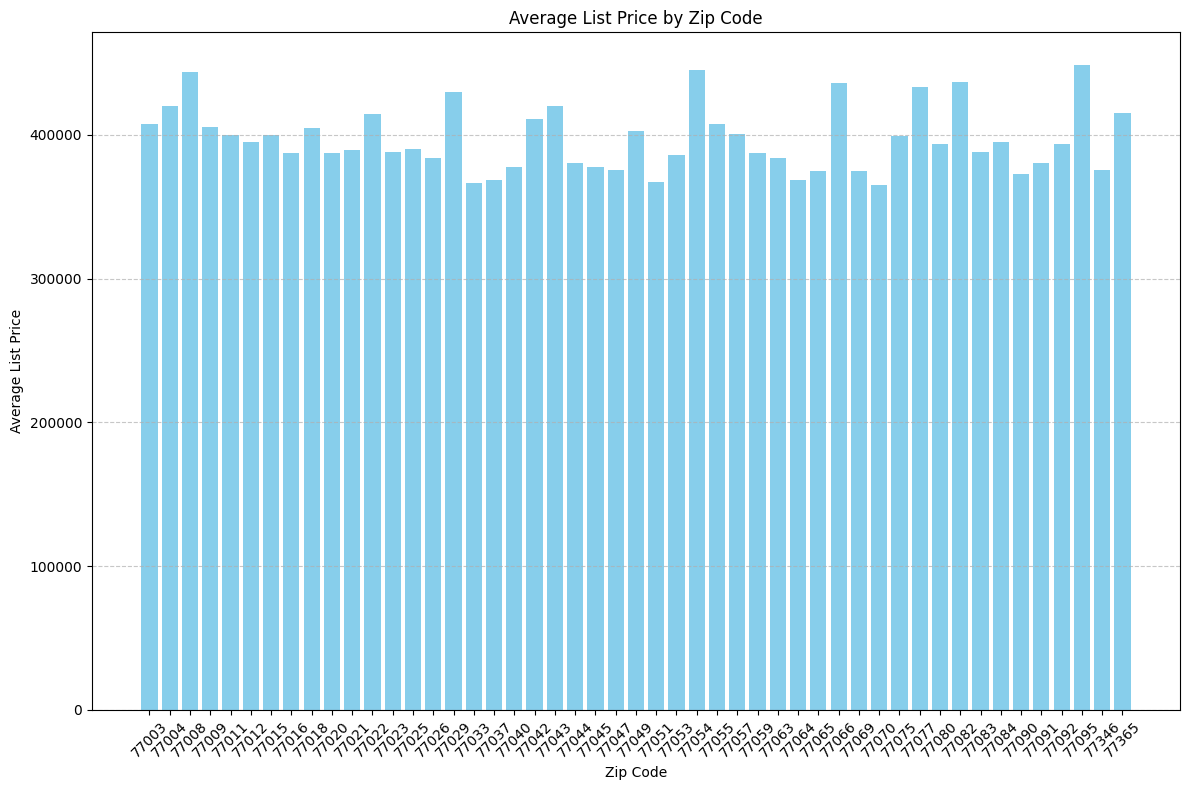

In [18]:
# Create a bar chart of average list price by zip code with clearer formatting

plt.figure(figsize=(12, 8))
plt.bar(df_merged['Zip Code'].astype(str), df_merged['List Price'], color='skyblue')
plt.title('Average List Price by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Average List Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# use "tight layout" fit into the figure area and minimizes the overlap between subplots and ensures that the subplots are properly spaced and aligned within the figure. 
plt.tight_layout()
plt.show()


In [19]:
# # Filter out zip codes 77100-77330
# #use ~ to see all the zip codes
# filtered_df = df_merged[~df_merged['Zip Code'].between(77100, 77330)]

# # Reset index to ensure proper alignment for labeling
# filtered_df.reset_index(drop=True, inplace=True)

# # Create a bar chart of average list price by zip code with clearer formatting and only non-missing zip codes
# plt.figure(figsize=(12, 8))
# bar_plot = plt.bar(filtered_df.index, filtered_df['List Price'], color='skyblue')
# plt.title('Average List Price by Zip Code (Excluding 77100-77330)')
# plt.xlabel('Zip Code')
# plt.ylabel('Average List Price')
# plt.xticks(filtered_df.index, filtered_df['Zip Code'], rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

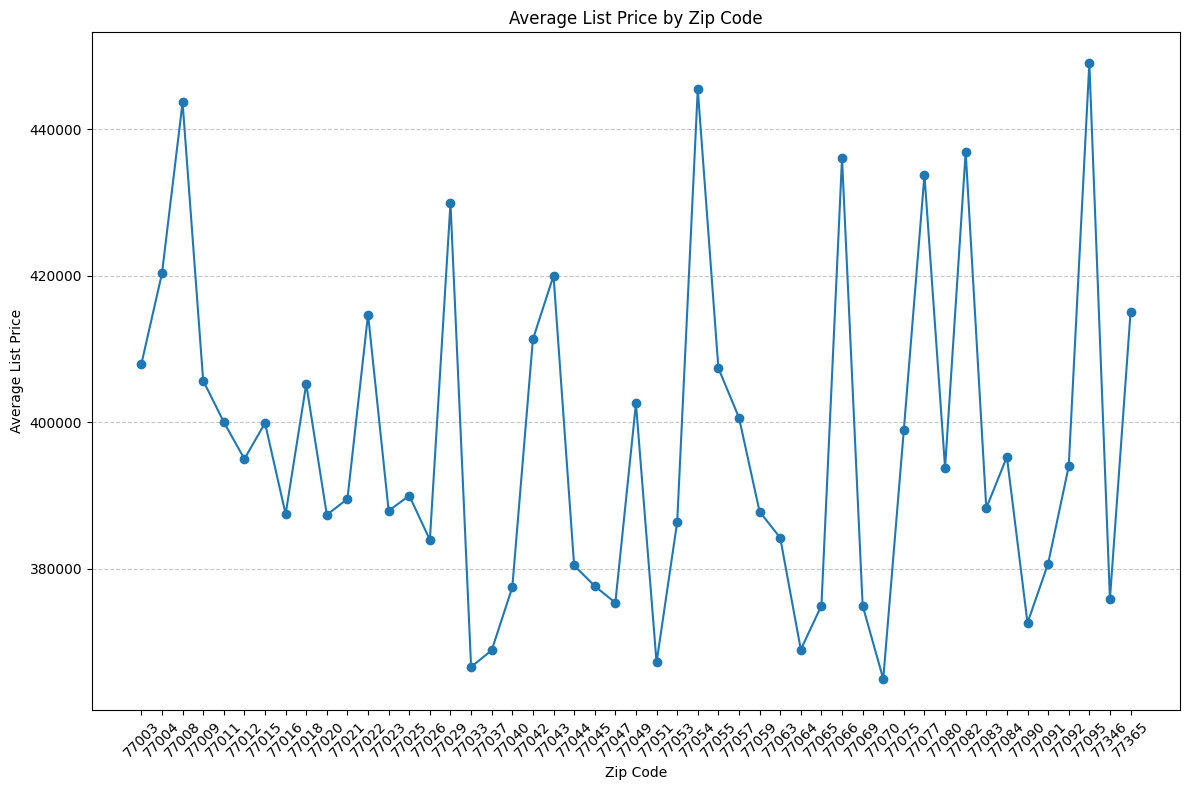

In [20]:
# Create a line chart of average list price by zip code
plt.figure(figsize=(12, 8))
plt.plot(df_merged.index, df_merged['List Price'], marker='o', linestyle='-')
plt.title('Average List Price by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Average List Price')
plt.xticks(df_merged.index, df_merged['Zip Code'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()